# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Importing the datasets

In [2]:
dataset = pd.read_csv('combined1.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Encoding Categorical Data

In [3]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')

In [4]:
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the Training set and Test set


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# Training the Decision Tree Regression model on the Training set

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

# Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2.81  2.8 ]
 [ 0.64  0.6 ]
 [ 0.07 -0.5 ]
 [ 0.47  0.6 ]]


# Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9400040869943455

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

0.29360965157841773

In [13]:
value = list(range(len(y_test))) * 2
test = y_test.tolist()
pred = y_pred.tolist()
test.extend(pred)
data_type = ["test"] * len(y_test) + ["pred"] * len(y_test)


In [14]:
plot = pd.DataFrame(data = {"Value": value,
                           "Y" : test,
                           "Type" : data_type})

plot

,Value,Y,Type
0,0,2.8000,test
1,1,0.6000,test
2,2,-0.5000,test
3,3,0.6000,test
4,0,2.8080,pred
5,1,0.6437,pred
6,2,0.0709,pred
7,3,0.4699,pred


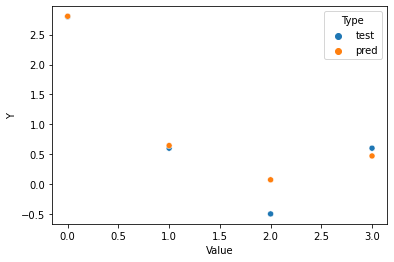

In [23]:
import seaborn as sns
sns.scatterplot(data=plot, x="Value", y="Y", hue="Type")
plt.show()

In [21]:
feature_list = dataset.columns[:-1].tolist()

importances = list(regressor.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for feature in feature_importances:
    print("feature: {} = {}".format(feature[0], feature[1]))

feature: employment_change = 0.33
feature: retrench_total = 0.32
feature: income_%_change = 0.17
feature: recruitment_change = 0.14
feature: resignation_change = 0.03
feature: year = 0.0
feature: industry1 = 0.0
